In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from timeit import default_timer as timer
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'svg'

#### An algorithm for maximization/minimization of an arithmetical expression uzing Bellman's optimality principle . See [link](https://neerc.ifmo.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BE_%D1%80%D0%B0%D1%81%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5_%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2_%D0%B2_%D0%B2%D1%8B%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B8)

In [2]:
# function for recursively getting result from the tables received using dynamic programming
def get_result(current, e,result_expr,index_table, operators):
    if len(current) == 1:
        return result_expr
    l = current[0][1]
    r = current[len(current) - 1][1]
    result_expr.insert(result_expr.index(current[0]),'(')
    result_expr.insert(result_expr.index(current[len(current) - 1])+1,')')
    index = index_table[l,r]
    operator = operators[l,r]
    index_result = result_expr.index(e[index])
    result_expr.insert(index_result+1,operator)
    get_result(e[l:index+1],e, result_expr,index_table,operators)
    get_result(e[index+1:r+1], e, result_expr,index_table,operators)
    return result_expr  

In [3]:
def dynamic_optimize(expr,method = 'maximize'):
    n = len(expr)
    d = np.zeros((n,n), dtype = int) #table d
    index_table = np.zeros((n,n), dtype = int) #table for indexes
    operators = np.zeros((n,n), dtype = str) #table for operators (+/*) 
    if (method != 'maximize') and (method != 'minimize'):
        print('Method description is incorrect')
    else:
        for i in range(n):
            d[i,i] = expr[i] 
    #calculation of values in the table d
        for i in range(n-2,-1,-1):
            for j in range(i+1,n):
                for k in range(i,j):
                    if method == 'maximize':
                        d_current = max(d[i,k]+d[k+1,j],d[i,k]*d[k+1,j]) 
                        if d[i,j] < d_current:
                            d[i,j] = d_current
                            index_table[i,j] = k
                            if d[i,k]*d[k+1,j] >= d[i,k]+d[k+1,j]:
                                operators[i,j] = '*'
                            else:
                                operators[i,j] = '+' 
                    else:
                        d_current = min(d[i,k]+d[k+1,j],d[i,k]*d[k+1,j])
                        if d[i,j] > d_current or d[i,j] ==0:
                            d[i,j] = d_current
                            index_table[i,j] = k
                            if d[i,k]*d[k+1,j] < d[i,k]+d[k+1,j]:
                                operators[i,j] = '*'
                            else:
                                operators[i,j] = '+'  
        e = []
        n = len(expr)
        for i in range(n):
            e.append((expr[i],i))
        result_expr = e[:]
        result = get_result(e[:], e,result_expr,index_table,operators) #recursively getting final expression
        res = [x[0] if type(x) is tuple else x for x in result]
        return ''.join(str(i) for i in res)+'='+str(d[0,n-1])

#### Usage example

In [4]:
maximum = dynamic_optimize([2,1,7,1,4,3],method = 'maximize')
print(maximum)

((2+1)*(7*((1+4)*3)))=315


In [5]:
minimum = dynamic_optimize([2,1,7,1,4,3],method = 'minimize')
print(minimum)

(2+(1*(7+(1*(4+3)))))=16


#### Speed and performance of the algorithm

In [6]:
# generate list of length n with random numbers in range [l,r]
def rand_lst(l, r, n): 
    res = []  
    for j in range(n): 
        res.append(randint(l, r)) 
    return res 


N = []
time_max = []
time_min = []
for i in range(10,500,20):
    N.append(i)
    expr = rand_lst(0,100,i) #generate list of random numbers of length i in range [0,10000]
    
    start = timer()
    maximum = dynamic_optimize(expr,method = 'maximize')
    end = timer()
    time_max.append(end-start)

    start = timer()
    mainimum = dynamic_optimize(expr,method = 'minimize')
    end = timer()
    time_min.append(end-start)

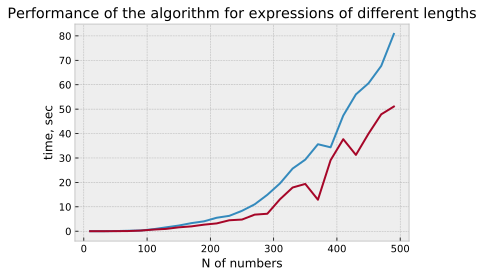

In [7]:
plt.plot(N,time_max,label = 'max')
plt.plot(N,time_min, label = 'min')
plt.ylabel('time, sec')
plt.xlabel('N of numbers')
plt.legend
plt.title('Performance of the algorithm for expressions of different lengths')
plt.show()

In [8]:
ran = [10,100,1000,10000,100000] 
time_range_max = []
time_range_min = []
time_range_max1 = []
time_range_min1 = []
for r in range(1,len(ran)):
    expr = rand_lst(ran[r-1],ran[r],10)
    start1 = timer()
    maximum = dynamic_optimize(expr,method = 'maximize')
    end1 = timer()
    
    start2 = timer()
    minimum = dynamic_optimize(expr,method = 'minimize')
    end2 = timer()
    time_range_max.append(end1-start1)
    time_range_min.append(end2-start2)
    
    expr = rand_lst(ran[r-1],ran[r],10)
    start1 = timer()
    maximum = dynamic_optimize(expr,method = 'maximize')
    end1 = timer()
    
    start2 = timer()
    minimum = dynamic_optimize(expr,method = 'minimize')
    end2 = timer()
    
    time_range_max1.append(end1-start1)
    time_range_min1.append(end2-start2)

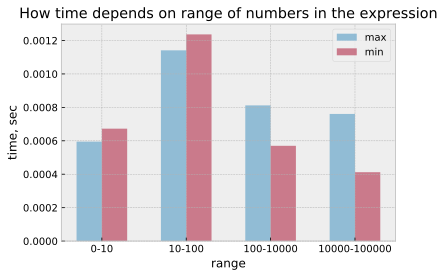

In [9]:
ranges = ('0-10', '10-100', '100-10000', '10000-100000')
y_pos = np.arange(len(ranges))
plt.bar(y_pos, time_range_max, alpha=0.5, label = 'max', width = 0.3)
plt.bar(y_pos+0.3, time_range_min, alpha=0.5, label = 'min', width = 0.3)
plt.xticks(y_pos+0.15, ranges)
plt.ylabel('time, sec')
plt.xlabel('range')
plt.title('How time depends on range of numbers in the expression')
plt.legend()
plt.show()

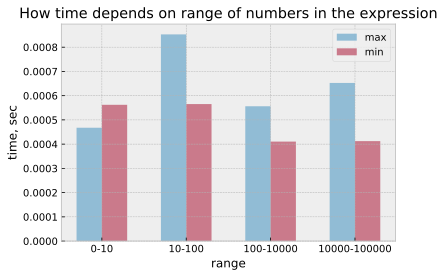

In [10]:
ranges = ('0-10', '10-100', '100-10000', '10000-100000')
y_pos = np.arange(len(ranges))
plt.bar(y_pos, time_range_max1, alpha=0.5, label = 'max', width = 0.3)
plt.bar(y_pos+0.3, time_range_min1, alpha=0.5, label = 'min', width = 0.3)
plt.xticks(y_pos+0.15, ranges)
plt.ylabel('time, sec')
plt.xlabel('range')
plt.title('How time depends on range of numbers in the expression')
plt.legend()
plt.show()